In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import sys, os, import_ipynb
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from Moduly.Preprocesing import normalizacja

importing Jupyter notebook from /media/kuba/DANE/Dokumenty/Informatyka/Projekty/Near-stopsKodons/grupowanie/Moduly/Preprocesing.ipynb


In [2]:
omegaB_dc_genes=pd.read_csv("Dane/Omega/Borrelia/GCF_000008685_dc_genes.csv",sep='\t')
omegaB=omegaB_dc_genes[["reg0_F","reg1_F","reg2_F"]].__array__().T

omegaC_dc_genes=pd.read_csv("Dane/Omega/Clostridium botulinum/GCF_000017025_dc_genes.csv",sep='\t')
omegaC=omegaC_dc_genes[["reg0_F","reg1_F","reg2_F"]].__array__().T

omegaE_dc_genes=pd.read_csv("Dane/Omega/Ehrlichia ruminantium/GCF_000026005_dc_genes.csv",sep='\t')
omegaE=omegaE_dc_genes[["reg0_F","reg1_F","reg2_F"]].__array__().T

kolorMaxE=np.where(omegaE[0]>omegaE[2],omegaE[0],omegaE[2])-omegaE[1]

kolorMinE=np.where(omegaE[0]<omegaE[2],omegaE[0],omegaE[2])-omegaE[1]

kolorMaxB=np.where(omegaB[0]>omegaB[2],omegaB[0],omegaB[2])-omegaB[1]

kolorMinB=np.where(omegaB[0]<omegaB[2],omegaB[0],omegaB[2])-omegaB[1]

kolorMaxC=np.where(omegaC[0]>omegaC[2],omegaC[0],omegaC[2])-omegaC[1]

kolorMinC=np.where(omegaC[0]<omegaC[2],omegaC[0],omegaC[2])-omegaC[1]

omega=np.hstack((omegaB,omegaC,omegaE))
kolorMax=np.hstack((kolorMaxB,kolorMaxC,kolorMaxE))
kolorMin=np.hstack((kolorMinB,kolorMinC,kolorMinE))

In [9]:
np.shape(kolorMax)

(5977,)

In [10]:
np.shape(omega)

(3, 5977)

In [11]:
tsne=TSNE(perplexity=15,learning_rate=100)
tsneWynik=tsne.fit_transform(omega.T).T

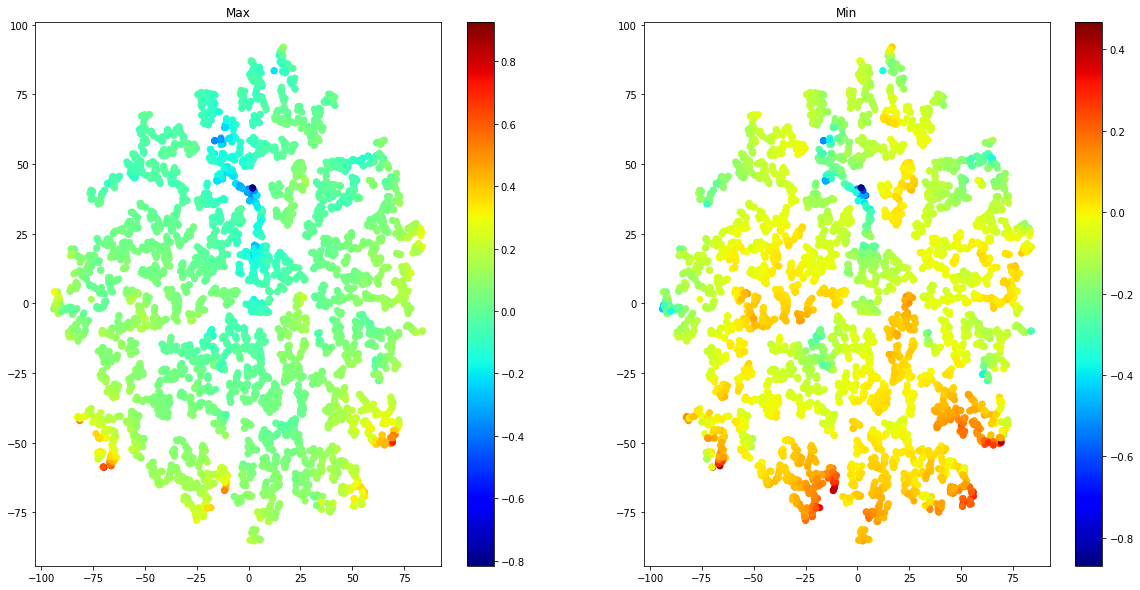

In [12]:
plt.gcf().set_size_inches(20,10)

def rysuj(kol):
    plt.scatter(tsneWynik[0],tsneWynik[1],c=kol,cmap="jet")
    plt.colorbar()

plt.subplot(1,2,1)
plt.title("Max")
rysuj(kolorMax)
plt.subplot(1,2,2)
plt.title("Min")
rysuj(kolorMin)

In [13]:
tsne=TSNE(perplexity=15,learning_rate=700)
tsneWynik=tsne.fit_transform(omega.T).T

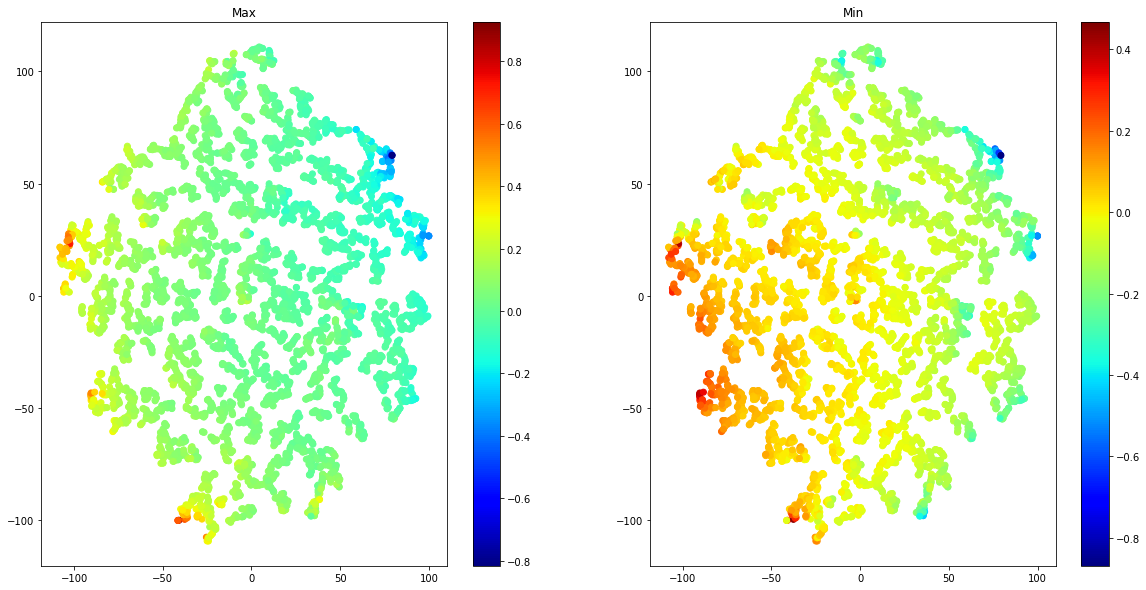

In [14]:
plt.gcf().set_size_inches(20,10)

def rysuj(kol):
    plt.scatter(tsneWynik[0],tsneWynik[1],c=kol,cmap="jet")
    plt.colorbar()

plt.subplot(1,2,1)
plt.title("Max")
rysuj(kolorMax)
plt.subplot(1,2,2)
plt.title("Min")
rysuj(kolorMin)

### Wykres min i max

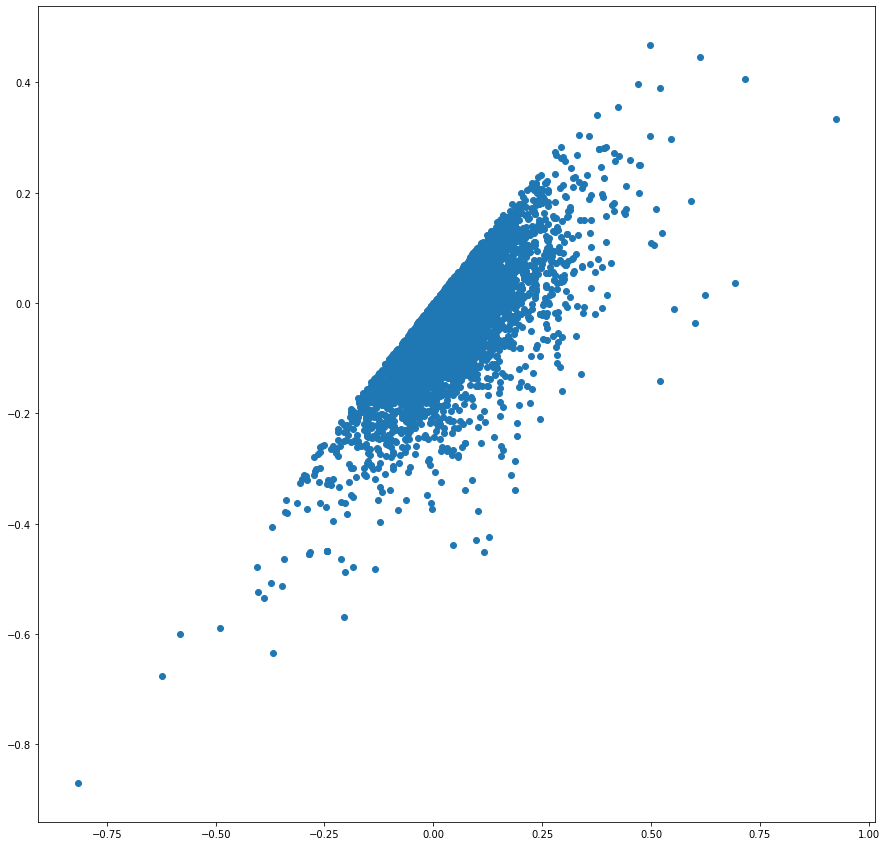

In [15]:
plt.gcf().set_size_inches(15,15)
plt.scatter(kolorMax, kolorMin)

In [16]:
np.shape(omega)

(3, 5977)

In [10]:
roznica0=omega[0]-omega[1]
roznica0

array([-0.06170374,  0.17754907,  0.032548  , ...,  0.07593398,
        0.00153635, -0.04905282])

In [11]:
roznica2=omega[2]-omega[1]
roznica2

array([-0.14604188,  0.02064598,  0.06508693, ...,  0.14718169,
       -0.02904275, -0.0450113 ])

Text(0, 0.5, 'Różnica 2')

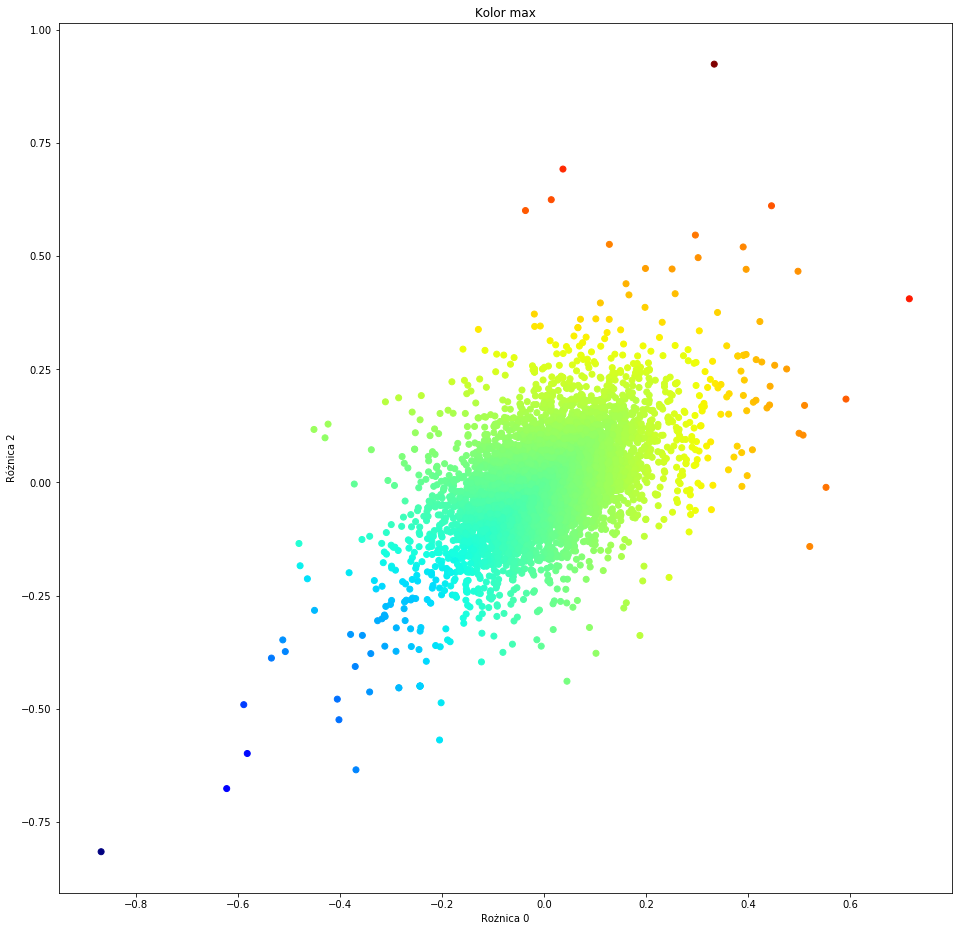

In [13]:
plt.gcf().set_size_inches(16,16)
plt.scatter(roznica0,roznica2, c=kolorMax, cmap='jet')
plt.title("Kolor max")
plt.xlabel("Rożnica 0")
plt.ylabel("Różnica 2")

In [20]:
roznice=np.vstack((roznica0, roznica2))
roznice

array([[-0.06170374,  0.17754907,  0.032548  , ...,  0.07593398,
         0.00153635, -0.04905282],
       [-0.14604188,  0.02064598,  0.06508693, ...,  0.14718169,
        -0.02904275, -0.0450113 ]])

In [21]:
tsne=TSNE()
tsneWynik=tsne.fit_transform(roznice.T).T

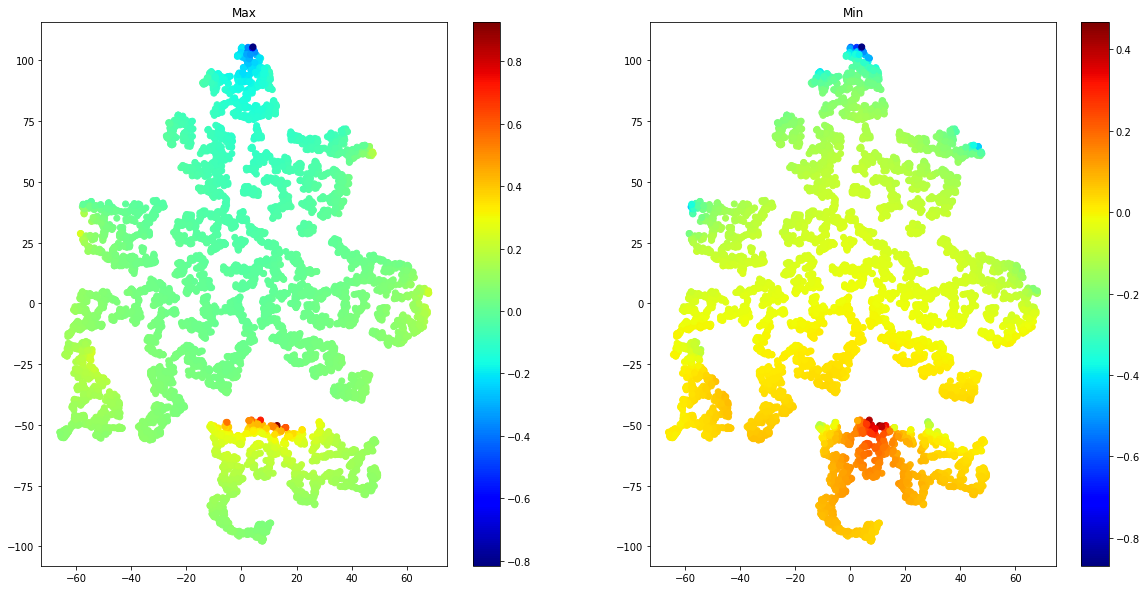

In [22]:
plt.gcf().set_size_inches(20,10)

def rysuj(kol):
    plt.scatter(tsneWynik[0],tsneWynik[1],c=kol,cmap="jet")
    plt.colorbar()

plt.subplot(1,2,1)
plt.title("Max")
rysuj(kolorMax)
plt.subplot(1,2,2)
plt.title("Min")
rysuj(kolorMin)